## Kaggle Language Identification

<div class="alert alert-info" style="margin: 20px">A beloved home South Africa is, with its melting pot of culture, art, tradition and boasts of 11 official languages found spread across all 9 of its Provinces. <br>
The purpose of the notebook is to take a journey into the heart and richness of the 11 amazing languages it posseses by creating a classification model that can detect which  of the 11 languages a text could belong... </div>

___
The notebook is a four part composition of how the classification of the texts in the 11 official languages will be carried out:


___
### Part 1 of the classification approach followed is to  import the neccessary libraries that aid in:
- Numerical computation
- Data Import and manipulation
- Data set split into training and test
- Model training and prediction

### Part 2 to follow is to import csv files namely of the:
- Train set
- Test set
- Sample sumbission
- Analyse the imported data

### Part 3 of the notebook is for:
- Training
- Predictions

### Part 4 of the notebook is for:
- Model hypertuning:
    - Ensemble Methods
    - Grid Search
    - Predictions
____

### Part 1: Import helper libraries

The libraries as mentioned are for numerical computation, data analysis and manipulation, training, predicting and scoring 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\jen\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jen\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\jen\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


___
### Part 2: Import data and perform analysis

This part of the notebook deals with reading in the data, analysing the data for the types of data types in the datasets, as this guides in the vectorization of features.
The above is done because machine learning models cannot train on object type data, therefore during analysis, data types are accounted for.
Missing values are also accounted for in the rows and also any whitespaces within the columns.
Lastly, the label column classes are checked for data imbalancing to see the distribution of the classes and if any resampling will need to be performed

In [2]:
# Import the datasets
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [3]:
# Viewing the sample_submission file to see how the submission file should look
sub = pd.read_csv('sample_submission.csv')
sub.head()

,index,lang_id
0,1,tsn
1,2,nbl


___
#### Analysis of the train set

The first analysis is performed on the train set in the the following cells below:

In [4]:
# View the first 5 rows of the test set
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
# Viewing the train columns and rows to ensure that 33000 rows and 2 columns are imported
train.shape

(33000, 2)

In [6]:
# Summary statistic for checking data types, null_values, number of observations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [7]:
# This code is just to ascertain that null values are indeed 0
train.isnull().sum()

lang_id    0
text       0
dtype: int64

___
In data analysis, rows could or could not have missing values, in the case of missing values, pandas methods are used to handle such values in a desired manner. When dealing with text data however, extra caution needs to be taken, as some entries could not report as `NaN` in the summary statistic but could be saved as empty string or white spaces. The code below accounts for such a precaution.

In [8]:
# Create a list called blanks_list to append any null values saved as empty strings or white spaces
blanks_list = []
# Iterate over the dataframe to check for whitespaces in the 'text' column
for index, label, text in train.itertuples():
    if type(text) == str:
        if text.isspace():
            blanks_list.append(index) # If any whitespaces are found, append their corresponding index
                                      # to the blanks_list
# There are no white spaces in the 'text' column
len(blanks_list)

0


___
#### Full names of the classes in the `lang_df` column of the train set 

It would be helpful to get the full names of the languges in the `lang_id` column of the train set.

Below is the full names of the classes in the `lang_id` column.

| Lang_Id       | Language Name       |
| ------------- |:-------------------:|
| sot           | Sesotho             |
| ssw           | siSwati             |
| nso           | Sepedi              |
| zul           | isiZulu             |
| afr           | Afrikaans           |
| xho           | isiXhosa            |
| tso           | Xitsonga            |
| eng           | English             |
| tsn           | Setswana            |
| nbl           | isiNdebele          |
| ven           | Tshivenda           |


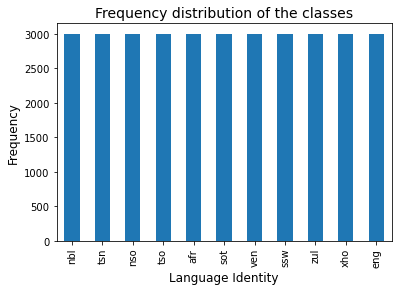

In [9]:
# Visualising the frequency distribution of each class in the 'lang_id' column, the label counts are equal
train['lang_id'].value_counts().plot(kind = 'bar')
plt.xlabel('Language Identity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Frequency distribution of the classes', fontsize = 14)
plt.show()

The classes are well balanced with each other and resampling for this dataset will not be needed

___
#### Analysis of the test set

The second analysis is performed on the train set in the the following cells below:

In [10]:
# View the first 5 rows of the test set
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [11]:
# Viewing the test columns and rows to ensure that 5682 rows and 2 columns are imported
test.shape

(5682, 2)

In [12]:
# Summary statistic for checking data types, null_values, number of observations
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [13]:
# This code is just to ascertain that null values are indeed 0
test.isnull().sum()

index    0
text     0
dtype: int64

___
As already mentioned above, in data analysis, rows could or could not have missing values, in the case of missing values, pandas methods are used to handle such values in a desired manner. When dealing with text data however, extra caution needs to be taken, as some entries could not report as `NaN` in the summary statistic but could be saved as empty string or white spaces. The code below accounts for such a precaution.

In [14]:
# Create a list called blanks_list to append any null values saved as empty strings or white spaces
blanks_list = []
# Iterate over the dataframe to check for whitespaces in the 'text' column
for index, label, text in test.itertuples():
    if type(text) == str:
        if text.isspace():
            blanks_list.append(index) # If any whitespaces are found, append their corresponding index
                                      # to the blanks_list
                
                
# There are no white spaces in the 'text' column
len(blanks_list)

0

___
### Part 3: Training and Predictions

- Training
- Predictions
___

#### Training
In this part of the notebook, the train set data is split into **`X`** features, using the 'text' column of the train dataframe and **`y`** labels using the 'lang_df' column of the train dataframe.
The data is split as **`25% for the testing set and 75% for the training set with a random_state of 42`**



##### Evaluation metric

The evaluation metric of the is classification is the **`F1_score`**, depicted with the formula below:


$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$



According to [deepai.org](https://deepai.org/machine-learning-glossary-and-terms/f-score).The F1_score is a measure of a model’s accuracy on a dataset, and it is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall. 
___

In [15]:
# Seperate X and y
X = train['text']
y = train['lang_id']

# Split the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)


___
#### The first set of models are trained on their default parameters

**Logistic Regression**

The first base model to be tested is a `Logistic Regression` model with multi_class set to `one-vs-rest` and will all other parameters set to default

In [16]:
# Logistic regression with default params pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression(multi_class = 'ovr'))])

# Fit the model
logreg = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = logreg.predict(X_test)

# Print the F1_score
print('The F1_Score of the Logistic Regression model with default parameters is:',f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of the Logistic Regression model with default parameters is: 0.9944853939482295

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       0.98      0.99      0.99       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       0.99      0.99      0.99       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.99      1.00      0.99       761
         zul       0.98      0.97      0.98       735

    accuracy                           0.99      8250
   macro avg       0.99      0.99      0.99      8250
weighted avg       0.99      0.99      0.99      8250



**Logistic Regression Results**:
The Logistic Regression as the first model to be submitted returned an `F1_score of 0.88096`


___
**Random Forest Classifier**

The second model to be tested is a `Random Forest Classifier` model with parameters set to default

In [17]:
# Random Forest Classifier with default params pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

# Fit the model
rfc = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = rfc.predict(X_test)

# Print the overall accuracy
print('The F1_Score of the Random Forest Classifier model with default parameters is:',f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of the Random Forest Classifier model with default parameters is: 0.9847108836157633

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       754
         eng       0.99      1.00      1.00       762
         nbl       0.98      0.95      0.96       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       0.99      0.96      0.97       732
         tsn       0.99      0.99      0.99       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.98      0.98      0.98       761
         zul       0.92      0.96      0.94       735

    accuracy                           0.98      8250
   macro avg       0.98      0.98      0.98      8250
weighted avg       0.99      0.98      0.98      8250



**Random Forest Classifier Results**:
The Random Forest Classifier as the second model to be submitted returned an `F1_score of 0.87062`

___
**Support Vector Classifier**

The third model to be tested is a `Support Vector Classifier` model with parameters set to default

In [18]:
# Support Vector Classifier with default params pipeline, and kernel = 'rbf'
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC())])

# Fit the model
model = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = model.predict(X_test)

# Print the F1_score
print('The F1_Score of the Support Vector Classifier model with default parameters is:',f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of the Support Vector Classifier model with default parameters is: 0.9951273633086045

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       754
         eng       1.00      0.99      1.00       762
         nbl       0.99      0.99      0.99       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.99      1.00      0.99       761
         zul       0.97      0.99      0.98       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



**Support Vector Classifier(kernel = 'rbf') Results**:
The SVC with kernel set to 'rbf' as the third model to be submitted returned the lowest score thus far with an `F1_score of 0.83726`

___
**Support Vector Classifier**

The fourth model to be tested is a `Support Vector Classifier` model with `kernel = 'linear'`

In [19]:
# Support Vector Classifier with default params pipeline, and kernel = 'linear'
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC(kernel = 'linear'))])

# Fit the model
model = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = model.predict(X_test)

# Print the F1_score
print("The F1_Score of the Support Vector Classifier model with kernel = 'linear' is:",f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of the Support Vector Classifier model with kernel = 'linear' is: 0.9963510578302327

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       0.99      0.99      0.99       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.99      1.00      0.99       761
         zul       0.98      0.99      0.99       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



**Support Vector Classifier(kernel = 'linear') Results**:
The SVC with kernel set to 'linear' as the third model to be submitted returned a better score than the rbf, with an `F1_score of 0.85918`

___
**Multinomial Naive Bayes**

The fifth model to be tested is the `Multinomial Naive Bayes` Model

In [46]:
# MultinomialNB with default params pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])

# Fit the model
mnb = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = mnb.predict(X_test)

# Print the F1_score
print("The F1_Score of Multinomial NB with default parameters is:",f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of Multinomial NB with default hyperparameters is: 0.9991517356099913

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       1.00      1.00      1.00       734
         nso       1.00      1.00      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       1.00      1.00      1.00       761
         zul       1.00      1.00      1.00       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



**Multinomial NB**:
Thus far the Multinomial Naive Bayes has given the best prediction on Kaggle, with an `F1_score of 0.95489`

___
#### Prediction on the test set

A new dataframe is created that takes in the index from the test dataframe and adds a new column `lang_id` from the predictions of the trained model

In [21]:
# Create a new dataframe, called sub_df that takes the 'index' column from the test dataset
sub_df = test[['index']]
sub_df.head()

,index
0,1
1,2
2,3
3,4
4,5


In [22]:
# Form a prediction set
test_pred = model.predict(test['text'])

In [23]:
# Add the prediction as a column to the sub_df dataframe
sub_df['lang_id'] = test_pred

In [24]:
# View the first few entries to ensure it looks similar to the required sample_submission
sub_df.head()

,index,lang_id
0,1,zul
1,2,nbl
2,3,ven
3,4,ssw
4,5,zul


In [25]:
# Submission file
sub_df.to_csv('base_submission_mnb.csv', index= False)

### Part 4: Model hypertuning

### Ensemble methods

In a nutshell, ensemble method take a combination of trained models to return a model with the best prediction out of the combination
___
**Voting Ensemble**

In [26]:
# Define the three top performing models which we'll be included in the ensemble
models = [('LR', logreg), ('RFC',rfc), ('MNB',mnb)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.25,0.05,0.65])
v_clf = VotingClassifier(estimators=models,weights=model_weightings)

# Train on the voting classifier
v_clf = v_clf.fit(X_train, y_train)

# Predict
y_pred = v_clf.predict(X_test)

# Print F1_score
print('The F1_Score of the Voting Classifier model is:',f1_score(y_test, y_pred, average = 'macro'))

The F1_Score of the Voting Classifier model is: 0.9981678584116064


The voting classifier voted in favour of the Multinomial NB and returned the same f1_score as the Multinomial NB
___
**Stacking Ensemble**

In [27]:
# Define the three top performing models which we'll be included in the ensemble
models = [('LR', logreg), ('RFC',rfc), ('MNB',mnb)]

# Declare meta_learner
mnb_meta = MultinomialNB()

# Instance for the stacking classifier
s_clf = StackingClassifier(estimators=models, final_estimator=mnb_meta)

# Fit the model
s_clf = s_clf.fit(X_train, y_train)

# Prediction
y_pred = s_clf.predict(X_test)

# Print the F1_score
print('The F1_Score of the Stacking Classifier model is:',f1_score(y_test, y_pred, average = 'macro'))

The F1_Score of the Stacking Classifier model is: 0.9965800360399842


Stacking brought the same F1_score lower as voting. Multinomial NB is the model in favour

The ensemble methods, both of them used with default parameters did not improve the Kaggle F1_score
___

### Hyperparameter tuning with GridSearchCV

**Random Forest Classifier**

In [28]:
# Dictionary of parameters
rfc_params = {'n_estimators': [5, 25, 50, 75, 100],
              'max_depth': [5, 10, 15, 20, 25],
              'random_state':[42]}

# Pipeline
pipe_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

# GridSearchCV for Random Forest
grfc = GridSearchCV(pipe_clf(), param_grid = rfc_params, cv = 5, n_jobs= -1)

# Fit the model
rfc = grfc.fit(X_train, y_train)

# Form a prediction set
y_pred = rfc.predict(X_test)

# Print the overall accuracy
print('The F1_Score of the Random Forest Classifier model with GridSearchCV is:',f1_score(y_test, y_pred, average = 'macro'))

The F1_Score of the Random Forest Classifier model with GridSearchCV is: 0.9605152201954077

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       754
         eng       0.99      1.00      0.99       762
         nbl       0.85      0.92      0.88       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       0.94      0.88      0.91       732
         tsn       0.99      1.00      0.99       746
         tso       0.99      1.00      0.99       700
         ven       1.00      1.00      1.00       785
         xho       0.93      0.92      0.92       761
         zul       0.89      0.86      0.88       735

    accuracy                           0.96      8250
   macro avg       0.96      0.96      0.96      8250
weighted avg       0.96      0.96      0.96      8250



GridSearchCV gives an error for the pipeline on Logistic Regression and Multinomial NB, the following hyperparameters were tuned without it

**Logistic Regression**

In [65]:
# Logistic regression with custom C parameter pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression(C = 0.1, multi_class = 'ovr'))])

# Fit the model
logreg = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = logreg.predict(X_test)

# Print the F1_score
print('The F1_Score of the Logistic Regression model with custom C is:',f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of the Logistic Regression model with custom C is: 0.9873908525483647

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       0.96      0.98      0.97       734
         nso       1.00      0.98      0.99       782
         sot       1.00      1.00      1.00       759
         ssw       0.98      0.99      0.99       732
         tsn       0.99      0.99      0.99       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.97      0.99      0.98       761
         zul       0.97      0.94      0.95       735

    accuracy                           0.99      8250
   macro avg       0.99      0.99      0.99      8250
weighted avg       0.99      0.99      0.99      8250



**Multinomial NB**

In [47]:
# MultinomialNB with custom alpha parameter pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB(alpha =  0.1))])

# Fit the model
mnb = text_clf.fit(X_train, y_train)

# Form a prediction set
y_pred = mnb.predict(X_test)

# Print the F1_score
print("The F1_Score of Multinomial NB with alpha = 0.1 is:",f1_score(y_test, y_pred, average = 'macro'))
print()
# Print a classification report
print(classification_report(y_test, y_pred))

The F1_Score of Multinomial NB with default hyperparameters is: 0.9991517356099913

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       1.00      1.00      1.00       734
         nso       1.00      1.00      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       1.00      1.00      1.00       761
         zul       1.00      1.00      1.00       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



___
#### Prediction on the test set

In [48]:
# Create a new dataframe, called sub_df that takes the 'index' column from the test dataset
sub_df = test[['index']]
sub_df.head()

,index
0,1
1,2
2,3
3,4
4,5


In [49]:
# Form a prediction set
test_pred = v_clf.predict(test['text'])

In [50]:
# Add the prediction as a column to the sub_df dataframe
sub_df['lang_id'] = test_pred

In [51]:
# View the first few entries to ensure it looks similar to the required sample_submission
sub_df.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [52]:
# Submission file
sub_df.to_csv('base_submission_mnba.csv', index= False)

### Conclusion

After hyperparameter tuning, the models did not lower or improve the score on Kaggle, all kept returning the same score of 0.95489, therefore the Kaggle final score is `F1_score: 0.95489`